# Calculate and graph performance summary statistics #

** Author: Andrew Larkin **, Oregon State University College of Public Health and Human Sciences <br>
** Date created: ** January 5th, 2018

### Summary ###
For evaluating performance of candidate models in train, dev, test, and independent datasets.  Calculate confusion matrices of model-dataset combinations.  Graph precision and recall for each model-dataset combation and outcome.

### Import libraries and define global variables and constants ###

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import copy
from matplotlib.pyplot import figure
import pandas as ps
import matplotlib.lines as mlines

In [2]:
# define input and output filepaths
parentFolder = "C:/Users/User/Desktop/DBTraining/"
performFolder = parentFolder + "modelTrainingPerformance/" 
inputCSV = performFolder + "ModelPerformance_v1.csv"   # intermediate file containing precision and recall estimates to graph


In [99]:
# load performanceMeasuresFromCSV
def loadPerformanceData(dataFilepath,debug=False):
    rawData = ps.read_csv(dataFilepath)
    
    # Second step in case future versions need to process input data
    processedData = rawData
    
    if(debug):
        print(processedData.head())
        keys = processedData.keys()
        print("number of records: %i" %len(processedData[keys[0]]))
    
    return(rawData)

In [57]:
dataset = loadPerformanceData(inputCSV,True)

      Outcome     Model   Dataset  Precision  Recall
0   Aesthetic  Emoticon  Training       0.92    0.81
1      Safety  Emoticon   NewYork       0.92    0.36
2         Air  Emoticon  Training       0.89    0.76
3  Greenspace  Emoticon  Training       0.88    0.92
4   Aesthetic  Emoticon      Test       0.88    0.66
number of records: 164


In [ ]:
def setAxisProperties(tempAxis,xDim,yDim,outcome):
    v_line = mlines.Line2D([0.7, 0.7], [0, 1], color='black',linestyle='dashed')
    h_line = mlines.Line2D([0,1],[0.7,0.7],color='black',linestyle='dashed')
    tempAxis.set_xlim(xDim)
    tempAxis.set_ylim(yDim)
    tempAxis.add_line(v_line)
    tempAxis.add_line(h_line)
    tempAxis.set_title(outcome)

['Emoticon', 'No Hashtag', 'No Location', 'NoEmbed', 'Whole']
0.86
compareLineX: [0.86, 0.84]
0.83
compareLineX: [0.83, 0.74]
0.85
compareLineX: [0.85, 0.83]
0.89
compareLineX: [0.89, 0.87]
{'Training': '#a05195', 'Test': 'green', 'Dev': 'red', 'NewYork': 'blue'} {'Whole': 'x', 'No Location': 's', 'No Hashtag': 'o', 'Emoticon': '+', 'NoEmbed': 'd'}


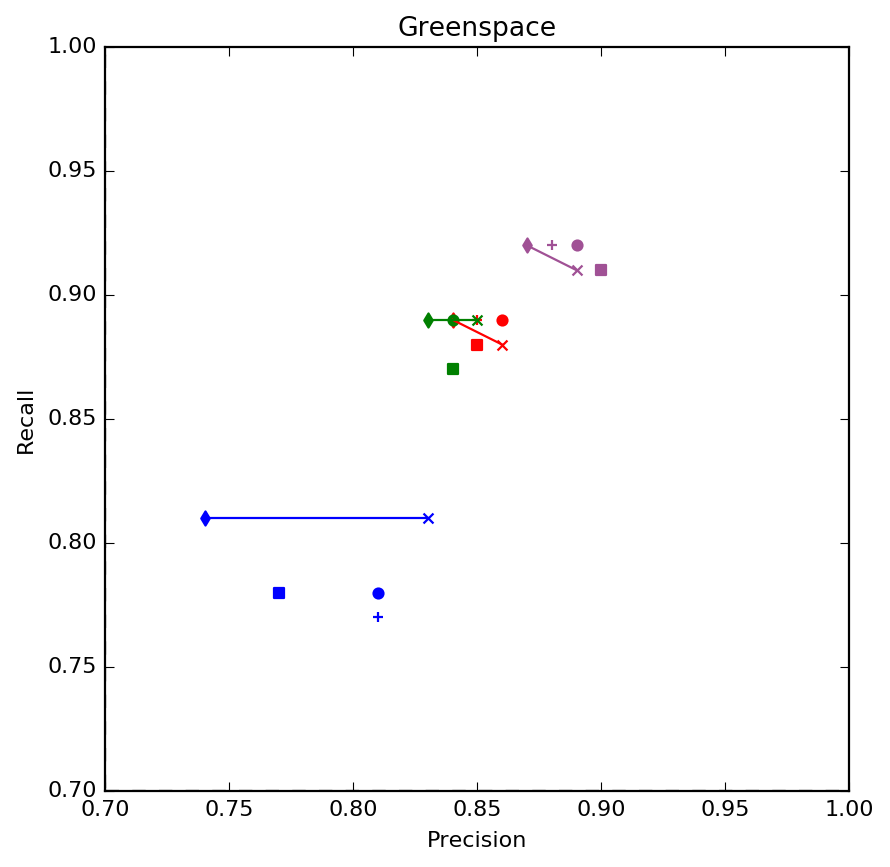

In [95]:
def plotByOutcome(dataaset,outcome,outcomeVar,subplotMatrix = [4,2,1],
                  xDim = [0.4,1],yDim = [0.2,1],
                  colorVec = ['red','blue','green','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600'], 
                  markerVec = ['+','o','s','d','x','^'],debug=False):
    
    
    
    # setup axis and graph properties
    tempAxis = plt.subplot(subplotMatrix[0],subplotMatrix[1],subplotMatrix[2])
    setAxisProperties(tempAxis,xDim,yDim,outcome)
    
    # reduce dataset to results for the outcome label of interest
    outcomeSubset = dataset.loc[dataset[outcomeVar] == outcome]
    
    # get list of unique datasets 
    dataOrigins = sorted(set(outcomeSubset['Dataset']))
    
    # get list of unique models 
    models = sorted(set(outcomeSubset['Model']))
    
    
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    
    if(debug):
        markerDict = {}
        colorDict = {}
        
    for origin in dataOrigins:
        
        compareLineX = [0,0]
        compareLineY = [0,0]
        
        originSubset = outcomeSubset.loc[outcomeSubset['Dataset'] == origin]
        pointColor = colorVec[dataOrigins.index(origin)]
        colorDict[origin] = pointColor
      
        for model in models:
            dataPoint = originSubset.loc[originSubset['Model'] == model]
            if(model == 'Whole'):
                compareLineX[0] = float(dataPoint['Precision'])
                compareLineY[0] = float(dataPoint['Recall'])
            elif(model == 'NoEmbed'):
                compareLineX[1] = float(dataPoint['Precision'])
                compareLineY[1] = float(dataPoint['Recall'])
            originMarker = markerVec[models.index(model)]
            markerDict[model] = originMarker
            plt.scatter(dataPoint['Precision'], dataPoint['Recall'],
                        marker = originMarker,
                        color = pointColor
                       )
        print("compareLineX: %s" %(str(compareLineX)))
        compare_line = mlines.Line2D(compareLineX,compareLineY,color=pointColor)
        tempAxis.add_line(compare_line)
    #plt.show()
    print(colorDict,markerDict)
#plotByOutcome(dataset,'Air','Outcome',[1,1,1],[0.4,1],[0.4,0.8])
fig = figure(num=None, figsize=(6, 6), dpi=160, facecolor='w', edgecolor='k')
plotByOutcome(dataset,'Greenspace','Outcome',[1,1,1],[0.7,1],[0.7,1])
plt.show()

In [98]:
fig = figure(num=None, figsize=(8, 16), dpi=160, facecolor='w', edgecolor='k')
fig.suptitle("Model Performance", fontsize=16)
uniqueOutcomes = set(dataset['Outcome'])
index = 1
colorDict = {}
markerDict = {}
yLims = [[0.4,1],[0.4,1],[0.5,1],[0.2,1],[0.5,1],[0.7,1],[0.0,1]]
xLims = [[0.4,1],[0.7,1],[0.7,1],[0.7,1],[0.7,1],[0.7,1],[0.4,1]]
for outcome in uniqueOutcomes:
    plotByOutcome(dataset,outcome,'Outcome',[4,2,index],xLims[index-1],yLims[index-1])
    index+=1
    
    #currOutcome = outcomeNames[index]
    #    currDev = devNames[index]
    #    createSubplot(trainDict,currOutcome,currDev,colorVec,index*2+1,currOutcome,None,"Training " + currOutcome)
    #createSubplot(devDict,currOutcome,currDev,colorVec,(index+1)*2,currOutcome,None,"Dev " + currOutcome)
    #fig.legend(bbox_to_anchor=(0.4, 0.18, 0, 0),loc='lower center', ncol=numParams)
print(colorDict)
print(markerDict)
#plt.show()
plt.savefig(performFolder + "ModelPerformance.eps", bbox_inches="tight")
#plt.show()
    

['Emoticon', 'No Hashtag', 'No Location', 'NoEmbed', 'Whole', 'zNoGreenspace']
0.92
compareLineX: [0.92, 0.84]
0.58
compareLineX: [0.58, 0.58]
0.77
compareLineX: [0.77, 0.64]
0.95
compareLineX: [0.95, 0.9]
{'Training': '#a05195', 'Test': 'green', 'Dev': 'red', 'NewYork': 'blue'} {'No Location': 's', 'zNoGreenspace': '^', 'Whole': 'x', 'No Hashtag': 'o', 'Emoticon': '+', 'NoEmbed': 'd'}
['Emoticon', 'No Hashtag', 'No Location', 'NoEmbed', 'Whole', 'zNoGreenspace']
0.83
compareLineX: [0.83, 0.76]
0.89
compareLineX: [0.89, 0.8]
0.83
compareLineX: [0.83, 0.75]
0.81
compareLineX: [0.81, 0.79]
{'Training': '#a05195', 'Test': 'green', 'Dev': 'red', 'NewYork': 'blue'} {'No Location': 's', 'zNoGreenspace': '^', 'Whole': 'x', 'No Hashtag': 'o', 'Emoticon': '+', 'NoEmbed': 'd'}
['Emoticon', 'No Hashtag', 'No Location', 'NoEmbed', 'Whole', 'zNoGreenspace']
0.82
compareLineX: [0.82, 0.86]
0.92
compareLineX: [0.92, 0.85]
0.87
compareLineX: [0.87, 0.87]
0.86
compareLineX: [0.86, 0.89]
{'Training': '#

### create subplot to fit within a series of plots.  Each subplot contains multiple values of a single hyperparameter ###
**Inputs:**<br>
- **dataDict** (dict) - dictionary containing data to graph <br>
- **yParam** (string) - name of key that corresponds to y-value to graph <br>
- **errParam** (string) - name of key that corresponds to std err tograph <br>
- **colorVec** (string array) - hexadecimal values for colors to distinguish between parameter values <br>
- **subplotIndex** (int) - which subplot space within the entire plot area to create the graph <br>
- **yLabel** (string) - y axis label <br>
- **xLabel** (string) - x axis label <br>
- **subplotTitle** (string) - title for subplot <br>

In [ ]:
def createSubplot(dataDict,yParam,errParam,colorVec,subplotIndex,yLabel,xLabel,subplotTitle):
    xVals = dataDict['epoch']
    yVals = dataDict[yParam]
    errVals = dataDict[errParam]
    paramVals = dataDict[dataDict['paramName']]
    xMax = max(xVals) + 10
    
    tempAxis = plt.subplot(8,2,subplotIndex)
    tempAxis.set_xlim([0,xMax])
    tempAxis.set_ylim([0,1.1])
    print(xMax)
    tempAxis.set_title(subplotTitle)
    if(1>2):
        print('a')
    #if(xLabel == None):
    #    plt.setp(tempAxis.get_xticklabels(),visible=False)
    else:
        plt.xlabel(xLabel)
    if(yLabel == None):
        plt.setp(tempAxis.get_yticklabels(), visible=False)
    else:
        plt.ylabel(yLabel)
    for i in range(len(paramVals)):
        currYVals =  np.asarray(yVals[i])
        currYVals = currYVals.reshape((len(xVals),))
        yErrVals = np.asarray(errVals[i]).reshape((len(xVals),))
        currColor = colorVec[i]
        #marker = 'o'
        plt.plot( xVals, currYVals, marker='None', markerfacecolor=currColor, label = paramVals[i], alpha = 0.8, color=currColor, linewidth=1)
        #plt.errorbar(xVals, currYVals.tolist(), yerr=np.asarray(yErrVals).tolist(),color = currColor,alpha = 0.2)

In [ ]:
# print model params on output figure.  Not used in current version but retained for optional future use.

def printModelParams(dataDict):
    testParam = dataDict['paramName']
    paramsInDict = dataDict.keys()
    modelParams = ['mini_batch_size', 
                   'learning_rate', 
                   'momentum',
                   'num_outcomes',
                   'postLSTM_layer_size',
                   'postLSTM_layers',
                   'pre_softmax_layer_size',
                   'keep_prob', 
                   'hidden_layer_activation',
                   ]
    outputText = "Other Tunable Model Params: \n"
    for printParam in modelParams:
        if printParam != testParam and printParam in paramsInDict:
            outputText += printParam + ": " + str(dataDict[printParam]) + "\n"
    plt.figtext(0.1,-0.18,outputText,horizontalalignment='left')

### create all subplots for a figure to evaluate model performance of various values for a single hyperparameter ###
**Inputs:**<br>
- **statsDict** (dict) - dictionary containing values to plot <br>
- **outputFilepath** (string) - filepath where output figure file should be saved <br>

In [ ]:
def createGraphs(statsDict,outputFilepath):
    trainDict = statsDict['trainDict']
    devDict = statsDict['devDict']
    fig = figure(num=None, figsize=(10, 18), dpi=160, facecolor='w', edgecolor='k')
    fig.suptitle(trainDict['paramName'] + " Performance", fontsize=16)
    colorVec = ['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
    epochVals = trainDict['epoch']
    maxEpoch = max(trainDict['epoch'])
    stepLen = (maxEpoch)/(len(trainDict['epoch']))
    numParams = len(trainDict['cost'][0])
    plt.xticks(np.arange(0, maxEpoch + 10, step=stepLen))
    outcomeNames = copy.deepcopy(statsDict['trainDict']['outcomeNames'])
    outcomeNames.append('cost')
    devNames = statsDict['trainDict']['outcomeDevNames']
    devNames.append('costErr')
    for index in range(len(outcomeNames)):
        currOutcome = outcomeNames[index]
        currDev = devNames[index]
        createSubplot(trainDict,currOutcome,currDev,colorVec,index*2+1,currOutcome,None,"Training " + currOutcome)
        createSubplot(devDict,currOutcome,currDev,colorVec,(index+1)*2,currOutcome,None,"Dev " + currOutcome)
    fig.legend(bbox_to_anchor=(0.4, 0.18, 0, 0),loc='lower center', ncol=numParams)
    
    
    
    #printModelParams(trainDict) # currently not used.  Retained for optional future functionality
    
    plt.savefig(outputFilepath, bbox_inches="tight")
    
    #plt.show() # only use for debugging purposes

### main function ###

In [ ]:
# load data from hard drive
datasets = readPickledPerformanceDatasets(performancePickleParams['learningRate'])

modelParam = 'learning_rate'
uniqueParams = []
for dataset in datasets:
    paramVal = dataset['modelParams'][modelParam]
    if(paramVal not in uniqueParams):
        uniqueParams.append(paramVal)

epochVals = list(set(datasets[0]['trainDict']['EpochNum']))
epochVals.sort()
outcomeNames = ['m_nature','m_safety','m_beauty','m_exercise','m_social','m_air','m_other']
outcomeDevNames = ['sd_nature','sd_safety','sd_beauty','sd_exercise','sd_social','sd_air','sd_other']
trainDict = {
    'datasetName':'train',
    'paramName':'learning_rate',
    'epoch':epochVals,
    'outcomeNames':outcomeNames,
    'outcomeDevNames':outcomeDevNames,
    'learning_rate':uniqueParams
}
devDict = {
    'datasetName':'dev',
    'paramName':'learning_rate',
    'epoch':epochVals,
    'outcomeNames':outcomeNames,
    'outcomeDevNames':outcomeDevNames,
    'learning_rate':uniqueParams
}   


summaryStatsDict = {'trainDict':trainDict,'devDict':devDict,'epochVals':epochVals,'numBatches':10}

for uniqueParam in uniqueParams:
    paramDatasetSubsets = []
    for dataset in datasets:
        paramVal = dataset['modelParams'][modelParam]
        if(paramVal == uniqueParam):
            paramDatasetSubsets.append(dataset)
    calcSummaryStatsSingleParamValue(summaryStatsDict,paramDatasetSubsets)

    
createGraphs(summaryStatsDict,"C:/users/larkinan/desktop/testPerformanceGraphsv_Extended.eps")